# Electricity sources

In [1]:
import os,sys
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk
import mtf
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt

# change plot layout
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 20})

odk_data_dir = '../../_datasets/DataODK/'
odk_folder_dir = 'HEDERA_SDG7/'
#odk_folder_dir = 'HEDERA_SDG7_19_07_05/'
## @brief name of the file (this should not be changed, it is set from ODK)
odk_data_name = 'HEDERA_SDG7_results.csv'


# initialize the institution
mfi = hedera.mfi(4)
# read database
data = mfi.read_survey(odk_data_dir + odk_folder_dir+odk_data_name,
                           delimiter='-')



mfi.HH = odk.households(data)

### Attributes describing the access to electricity

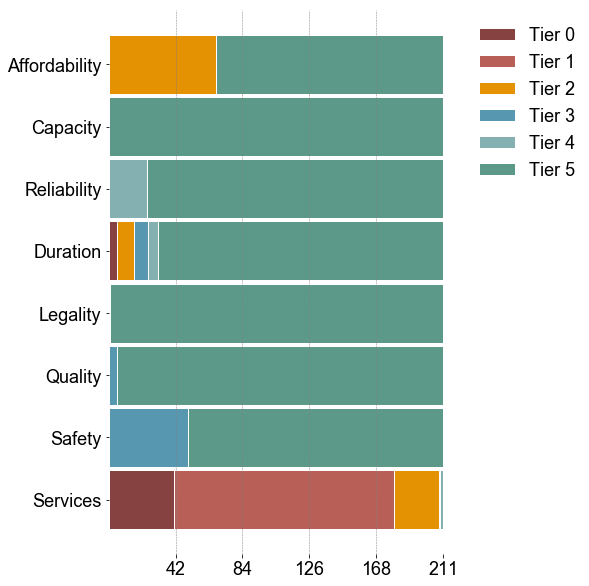

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(hedera.keys().attributes_electricity[0:8],
              hedera.names('en').e_attributes[0:8],legend=True)


### MTF Index (Access to electricity)

The MTF Index is given, for each household, by the minimum ranking among all considered attributes.

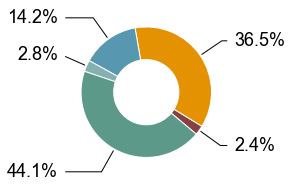

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_pie('E_Index')


## Electricity sources
### Primary sources

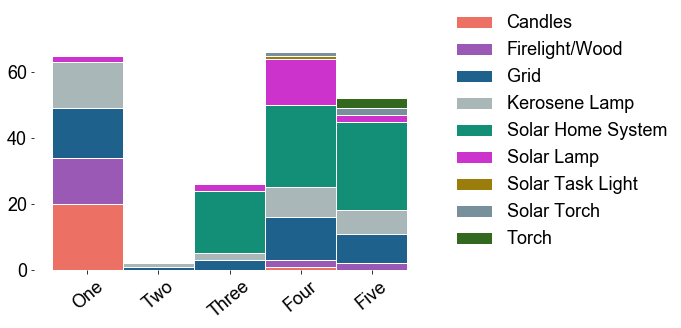

In [4]:
mfi.electricity_sources_summary(legend=True)

### Secondary sources

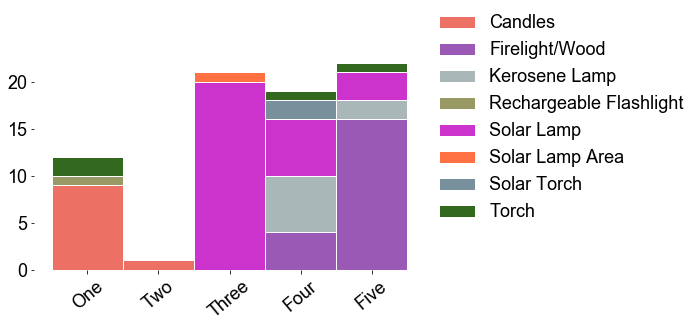

In [5]:
mfi.electricity_sources_summary(legend=True,primary=False,secondary=True)

### Primary and Secondary

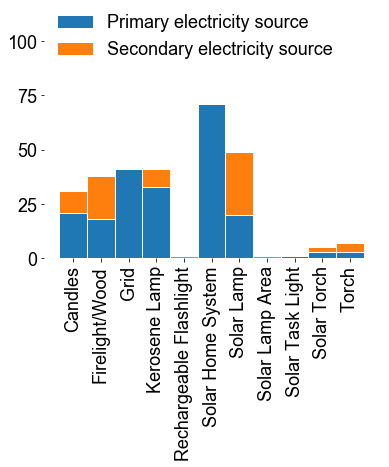

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
collection_overview = odk.overview(mfi.HH,mfi)
odk.plot_electricity_sources(collection_overview,'en')

## MTF Electricity Index vs. Primary Source

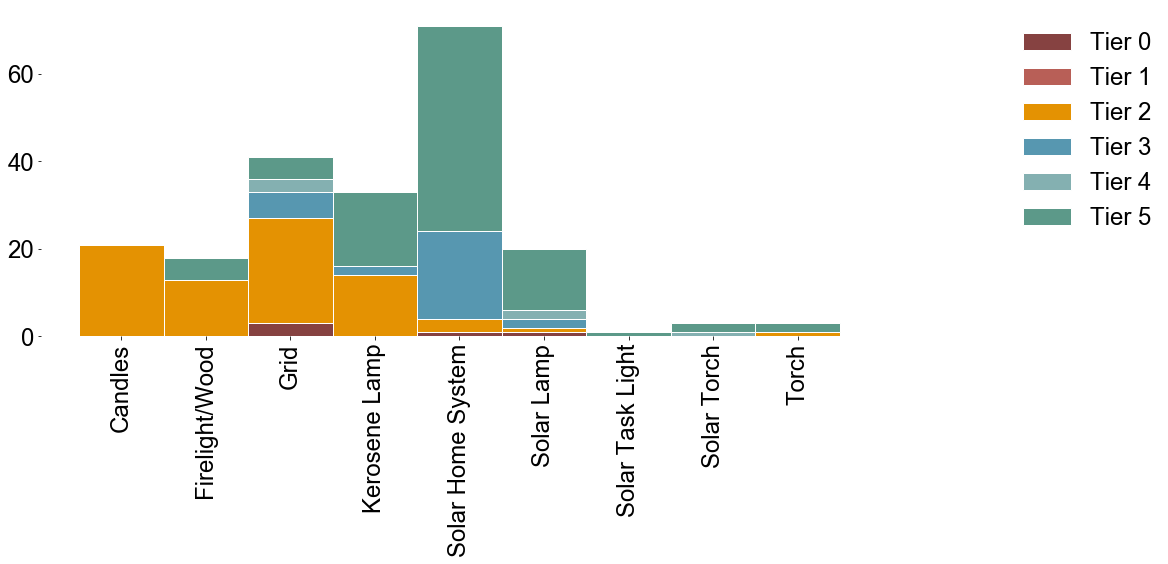

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
mfi.stacked_tier_per_category('E_Index',hedera.keys().powerSources,
                              'primary_electricity_source',
                              hedera.names('en').powerSources,legend=True)